# EDA Notebook

Exploratory data analysis is also an important step ahead of the modelling as it provides us with a better understanding of our dataset, allowing us to gain insights into the underlying distribution of features as well as uncover potential correlations which may exist between different variables.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import Lasso
from sklearn.feature_selection import mutual_info_classif

In [2]:
sys.path.append('../scripts')
import data_preprocessing

data_preprocessing.data_preprocessing()

Base.csv found. Skipping the download and extraction process...
Data Preprocessing...
Data Preprocessing completed successfully. Data saved to 'data/processed/undersampled_data.csv'.
Splitting the dataset into train-test subset...
Train-test split completed successfully. Data saved to 'data/processed/X_train.csv', 'data/processed/X_test.csv', 'data/processed/y_train.csv', and 'data/processed/y_test.csv'.


In [3]:
# read in data
df = pd.read_csv('../data/processed/undersampled_data.csv')

In [4]:
# Convert the variables to the appropriate data types
df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65970 entries, 0 to 65969
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   fraud_bool                        65970 non-null  category
 1   income                            65970 non-null  float64 
 2   name_email_similarity             65970 non-null  float64 
 3   prev_address_months_count         65970 non-null  int64   
 4   current_address_months_count      65970 non-null  int64   
 5   customer_age                      65970 non-null  int64   
 6   days_since_request                65970 non-null  float64 
 7   intended_balcon_amount            65970 non-null  float64 
 8   payment_type                      65970 non-null  category
 9   zip_count_4w                      65970 non-null  int64   
 10  velocity_6h                       65970 non-null  float64 
 11  velocity_24h                      65970 non-null  floa

In [6]:
df.describe(include='all')

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
count,65970.0,65970.000000,65970.000000,65970.000000,65970.000000,65970.000000,6.597000e+04,65970.000000,65970,65970.000000,...,65970.000000,65970.000000,65970.000000,65970.000000,65970,65970.000000,65970,65970.000000,65970.000000,65970.000000
unique,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,...,NaN,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN
top,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AB,NaN,...,NaN,NaN,NaN,NaN,INTERNET,NaN,windows,NaN,NaN,NaN
freq,54975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24377,NaN,...,NaN,NaN,NaN,NaN,65580,NaN,21064,NaN,NaN,NaN
mean,NaN,0.582239,0.478734,14.859239,91.314582,34.865697,1.024093e+00,7.859144,NaN,1578.856874,...,10.779006,0.199818,566.893891,0.030165,NaN,7.671521,NaN,0.542110,1.029847,3.327391
std,NaN,0.289798,0.292422,42.525438,88.619015,12.464541,5.478933e+00,19.611194,NaN,1002.648372,...,12.242900,0.399867,527.587965,0.171043,NaN,8.352740,NaN,0.498227,0.204106,2.228286
min,NaN,0.100000,0.000032,-1.000000,0.000000,10.000000,2.473609e-07,-1.000000,NaN,3.000000,...,-1.000000,0.000000,190.000000,0.000000,NaN,0.004589,NaN,0.000000,0.000000,0.000000
25%,NaN,0.300000,0.203774,-1.000000,25.000000,30.000000,6.924414e-03,-1.000000,NaN,895.000000,...,-1.000000,0.000000,200.000000,0.000000,NaN,3.130691,NaN,0.000000,1.000000,1.000000
50%,NaN,0.700000,0.473002,-1.000000,59.000000,30.000000,1.476952e-02,-1.000000,NaN,1272.000000,...,5.000000,0.000000,200.000000,0.000000,NaN,5.101145,NaN,1.000000,1.000000,3.000000
75%,NaN,0.900000,0.745608,9.000000,136.000000,40.000000,2.576707e-02,-1.000000,NaN,1964.000000,...,25.000000,0.000000,1000.000000,0.000000,NaN,8.816415,NaN,1.000000,1.000000,5.000000


## Variable Distribution Analysis

In this section, we delve into the distribution of variables to understand their spread and central tendency within the dataset, aiming to uncover any insights that may be readily apparent.

### Overall Distribution Analysis

We visualized the overall distribution of all numerical and binary variables using histograms. This step is crucial to avoid making inaccurate assumptions about the dataset, such as assuming specific variable distributions as Normal or Heavy-Tail distributions.

In [7]:
non_categorical_df = df.select_dtypes(exclude=['category'])
categorical_df = df.select_dtypes(include=['category'])

non_categorical_label_df = non_categorical_df.copy()
non_categorical_label_df['fraud_bool'] = df['fraud_bool']

non_categorical_fraud = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 1]
non_categorical_real = non_categorical_label_df[non_categorical_label_df['fraud_bool'] == 0]

categorical_label_df = categorical_df.copy()
categorical_label_df['fraud_bool'] = df['fraud_bool']

categorical_fraud = categorical_label_df[categorical_label_df['fraud_bool'] == 1]
categorical_real = categorical_label_df[categorical_label_df['fraud_bool'] == 0]

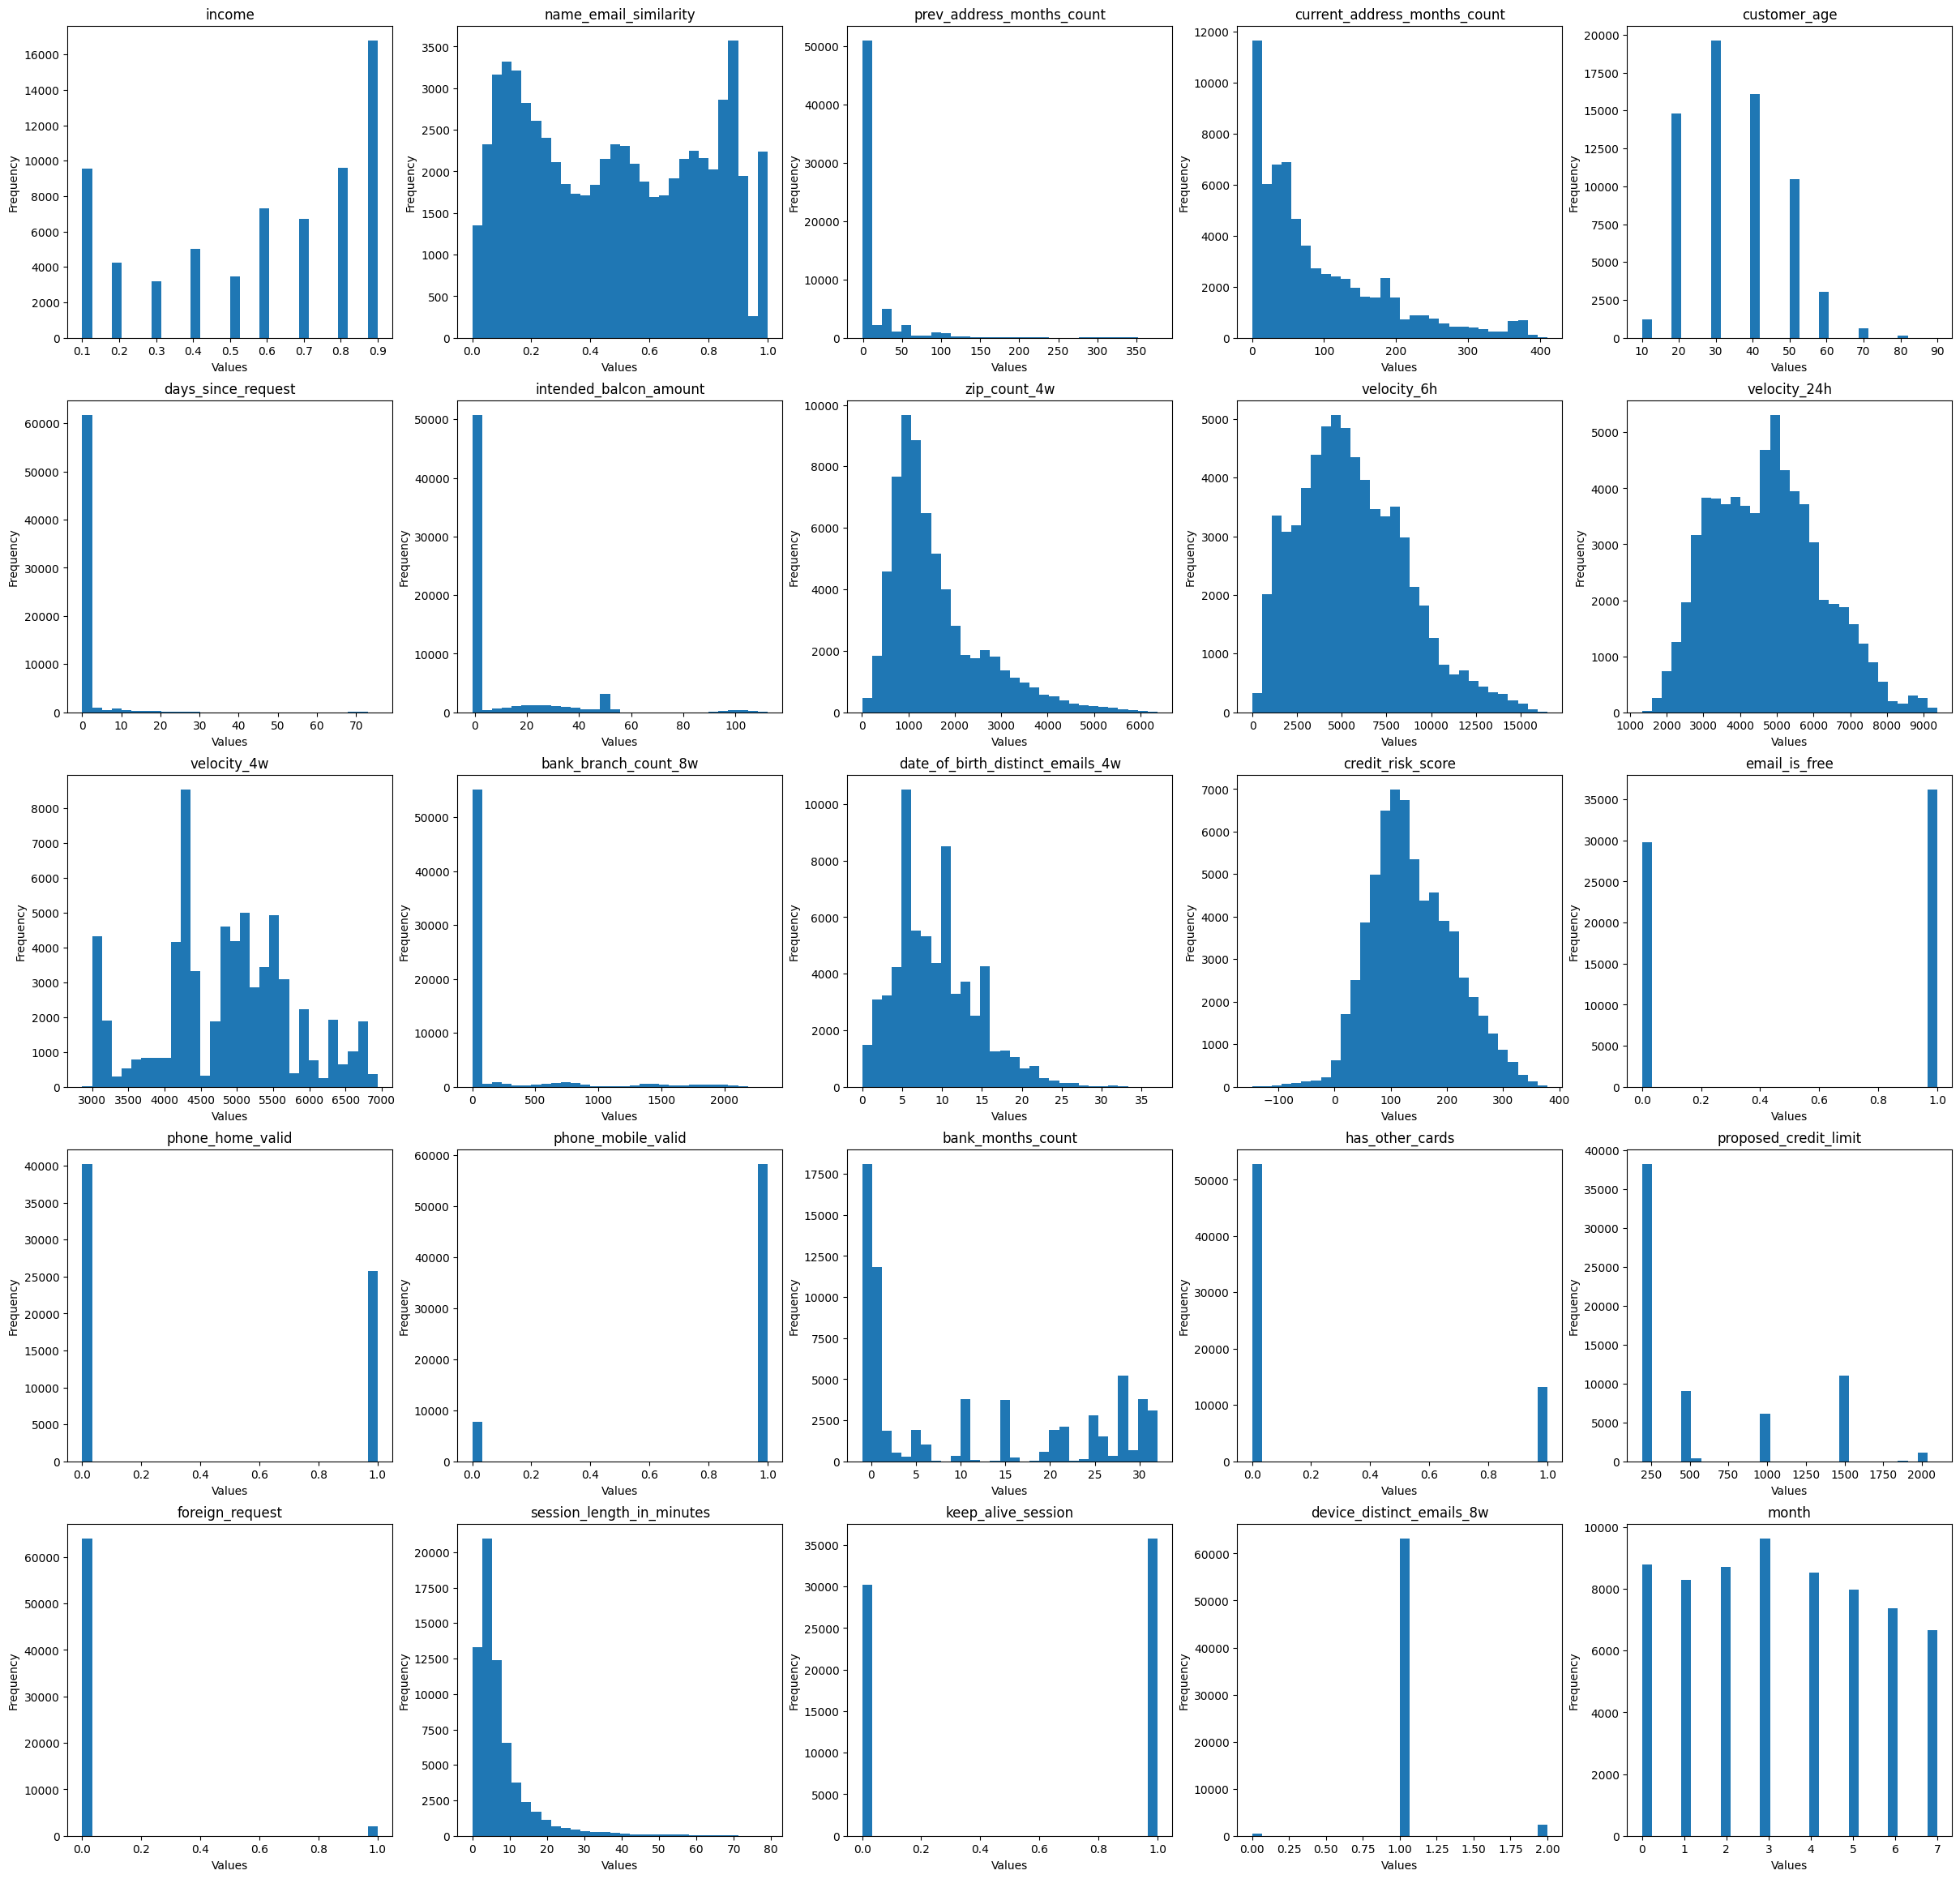

In [8]:
plt.figure(figsize=(30, 35))
# Loop through each column and plot its histogram on a separate subplot
for i, column_name in enumerate(non_categorical_df.columns):
    if (column_name == 'fraud_bool'):
        continue
    plt.subplot(6, 5, i+1)
    plt.hist(non_categorical_df[column_name], bins=30)
    plt.title(column_name)
    plt.xlabel('Values')
    plt.ylabel('Frequency')

# Display the plot
plt.show()


### Label-wise Distribution Analysis - Histogram

Further, we examined the distribution of variables by categorizing them according to labels using histograms. This deeper analysis provides insights into the specific distributions of fraudulent and non-fraudulent datasets for each variable. The visualization is separated between non-categorical variables and categorical variables.

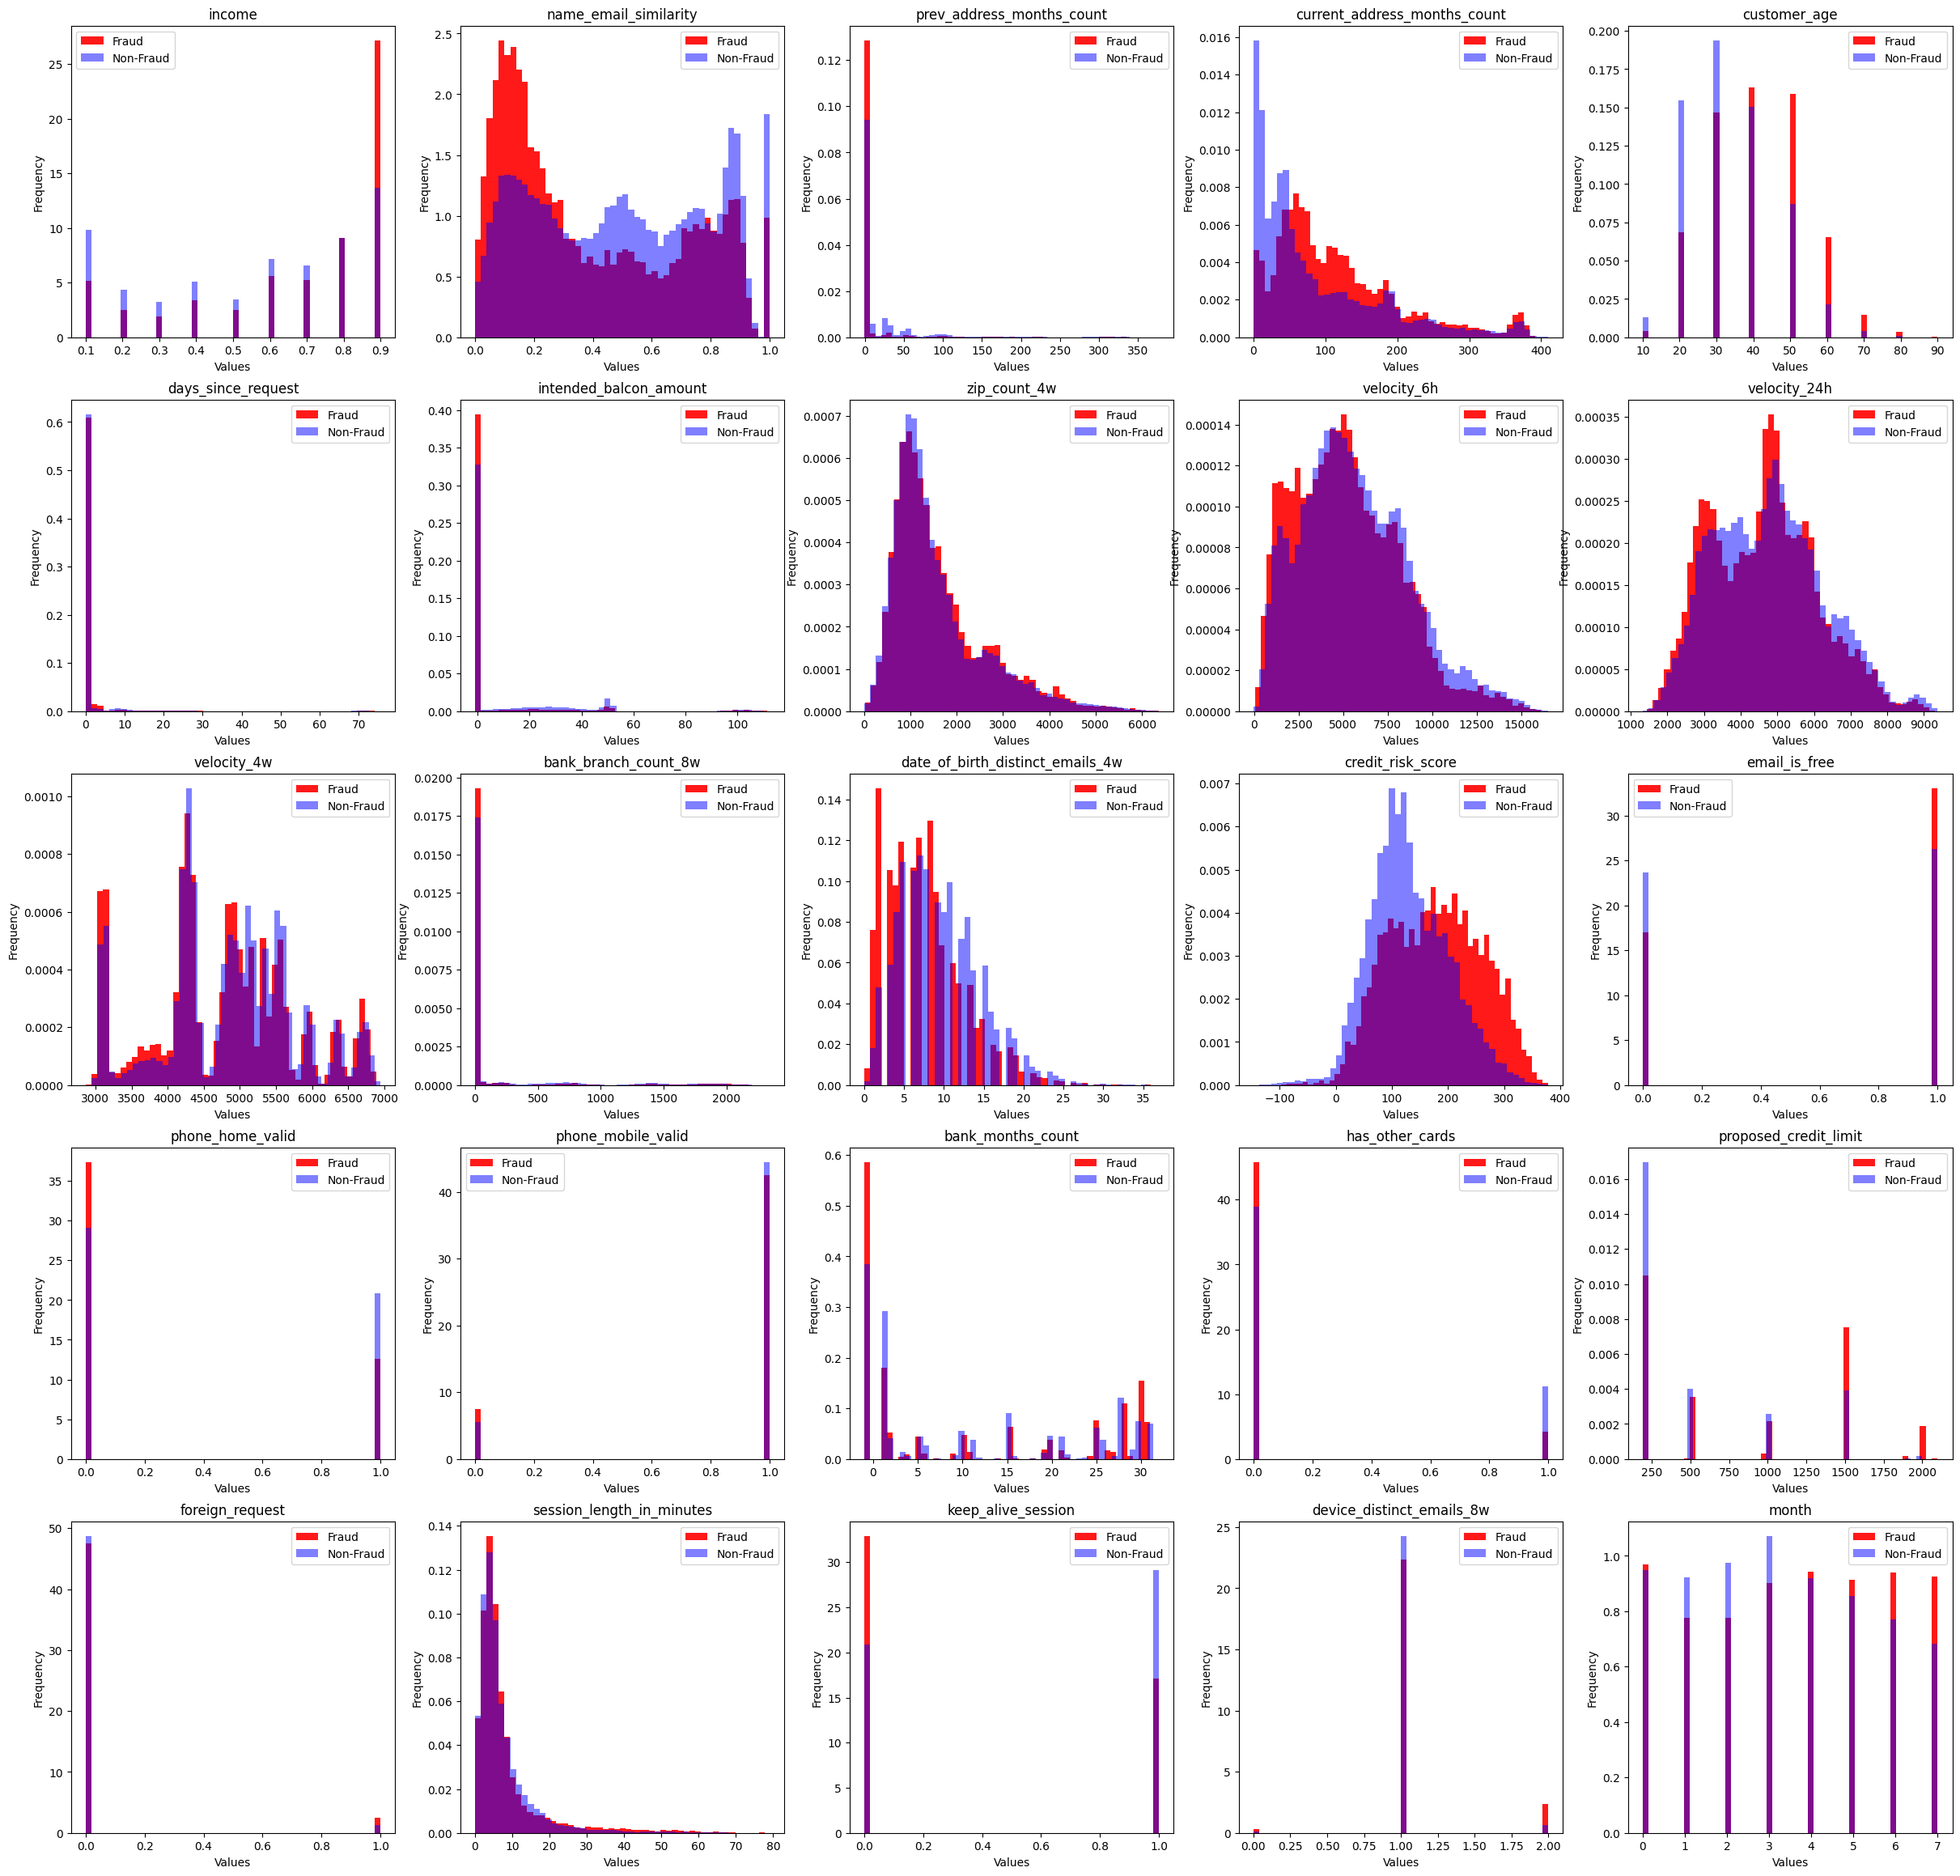

In [9]:
plt.figure(figsize=(30, 35))

# Loop through each column and plot its histogram on a separate subplot
for i, column in enumerate(non_categorical_fraud.columns):
    if (column == 'fraud_bool'):
        continue
    plt.subplot(6, 5, i+1)
    plt.hist(non_categorical_fraud[column], bins=50, label='Fraud', alpha=0.9, color='red', density=True)
    plt.hist(non_categorical_real[column], bins=50, label='Non-Fraud', alpha=0.5, color='blue', density=True)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

# Display the plot
plt.show()

From the visualization above,certain trends of fraudulent bank account applications were identified:
- `income` of fraudulent bank account applications tend to be higher than non-fraudulent bank account applications 
- `name_email_similarity` of fraudulent bank account applications tend to be lower than non-fraudulent bank account applications 
- `prev_address_months_count` of fraudulent bank account applications tend to be lower than non-fraudulent bank account applications
- `current_address_months_count` of fraudulent bank account applications tend to be higher than non-fraudulent bank account applications
- `customer_age` of fraudulent bank account applications tend to be higher than non-fraudulent bank account applications 
- `velocity_6h` of fraudulent bank account applications tend to be lower than non-fraudulent bank account applications 
- `credit_risk_score` of fraudulent bank account applications tend to be higher than non-fraudulent bank account applications 
- `email_is_free` of fraudulent bank account applications tend to be higher than non-fraudulent bank account applications 
- `phone_home_valid` of fraudulent bank account applications tend to be lower than non-fraudulent bank account applications 
- `has_other_cards` of fraudulent bank account applications tend to be lower than non-fraudulent bank account applications
- `proposed_credit_limit` of fraudulent bank account applications tend to be higher higher than non-fraudulent bank account applications 
- `keep_alive_session` of fraudulent bank account applications tend to be higher lower than non-fraudulent bank account applications

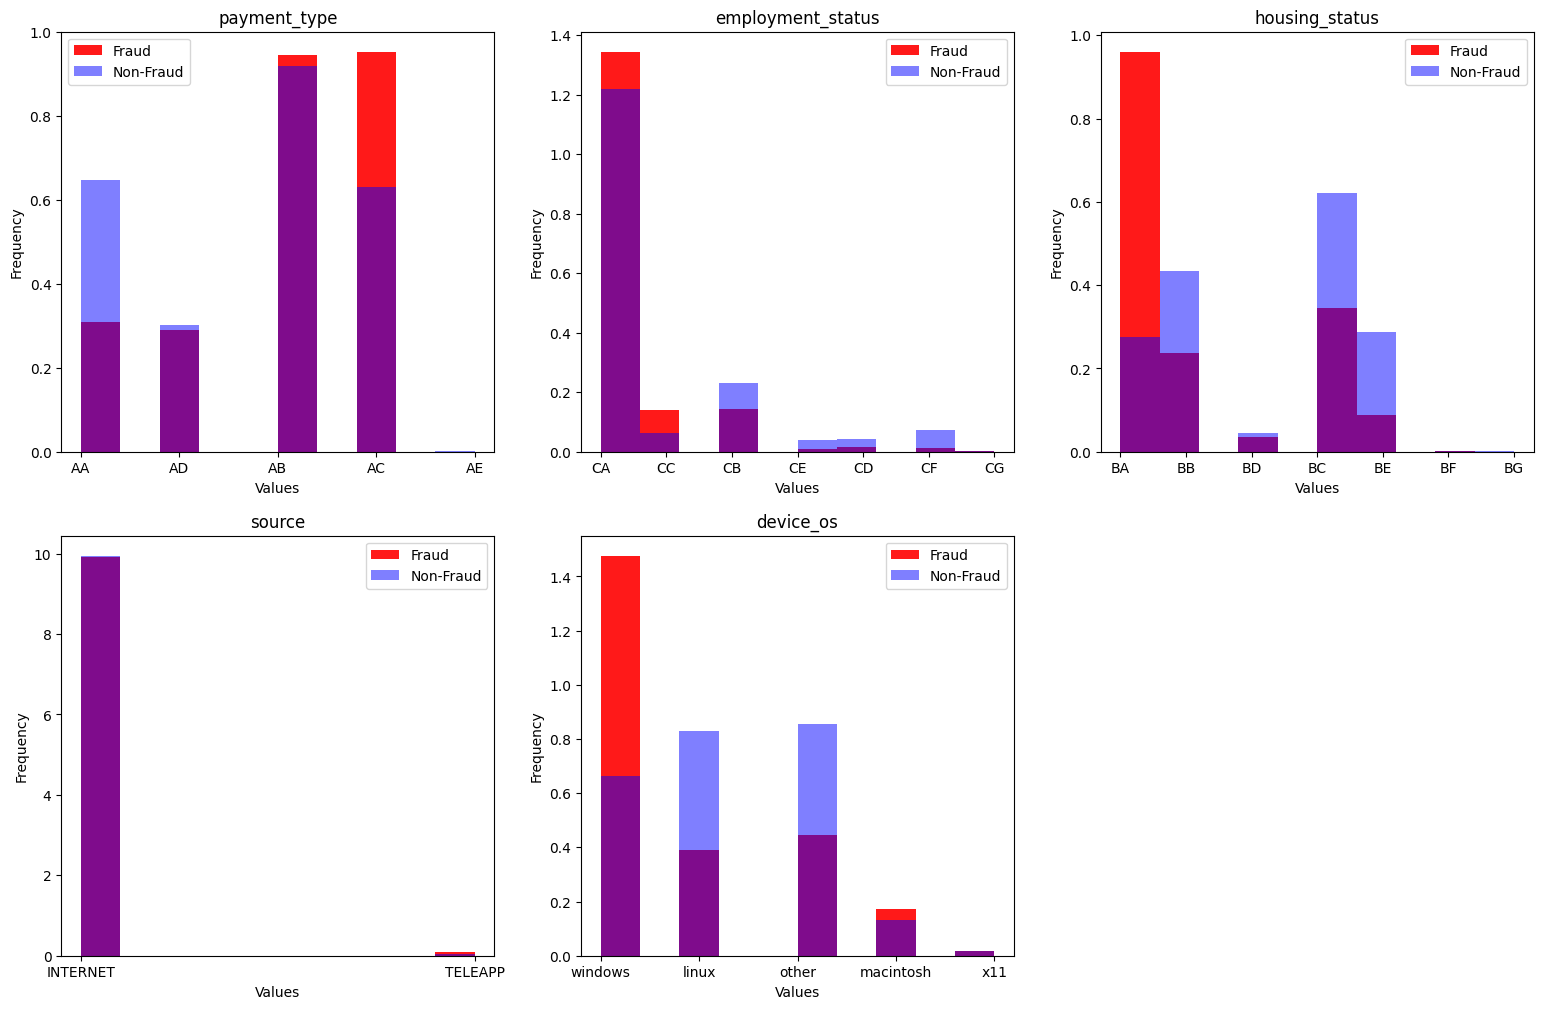

In [10]:
plt.figure(figsize=(19, 12))

# Loop through each column and plot its histogram on a separate subplot
for i, column in enumerate(categorical_fraud.columns):
    if (column == 'fraud_bool'):
        continue
    plt.subplot(2, 3, i)
    plt.hist(categorical_fraud[column], label='Fraud', alpha=0.9, color='red', density=True)
    plt.hist(categorical_real[column], label='Non-Fraud', alpha=0.5, color='blue', density=True)
    plt.title(column)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

# Display the plot
plt.show()

From the visualization above, we can identify certain trends of the fraudulent bank account applications:
- `payment_type` of fraudulent bank account applications tend to be higher in types AB & AC and lower in types AA compared to non-fraudulent bank account applications
- `employment_status` of fraudulent bank account applications tend to be higher in types CA & CC and lower in types CB, CE & CF compared to non-fraudulent bank account applications
- `housing_status` of fraudulent bank account applications tend to be higher in types BA and lower in types BB, BC & BE compared to non-fraudulent bank account applications
- `device_os` of fraudulent bank account applications tend to be higher in types windows & macintosh and lower in types linux & others compared to non-fraudulent bank account applications

### Label-wise Distribution Analysis - Boxplots

In addition to histograms, we explored the distribution of variables categorized by labels using boxplots. This method allows us to compare the spread of the variable with descriptive statistics. By observing the overlapping regions of the boxplots, we can make assumptions about certain behaviors of variables for fraudulent and non-fraudulent bank account applications.

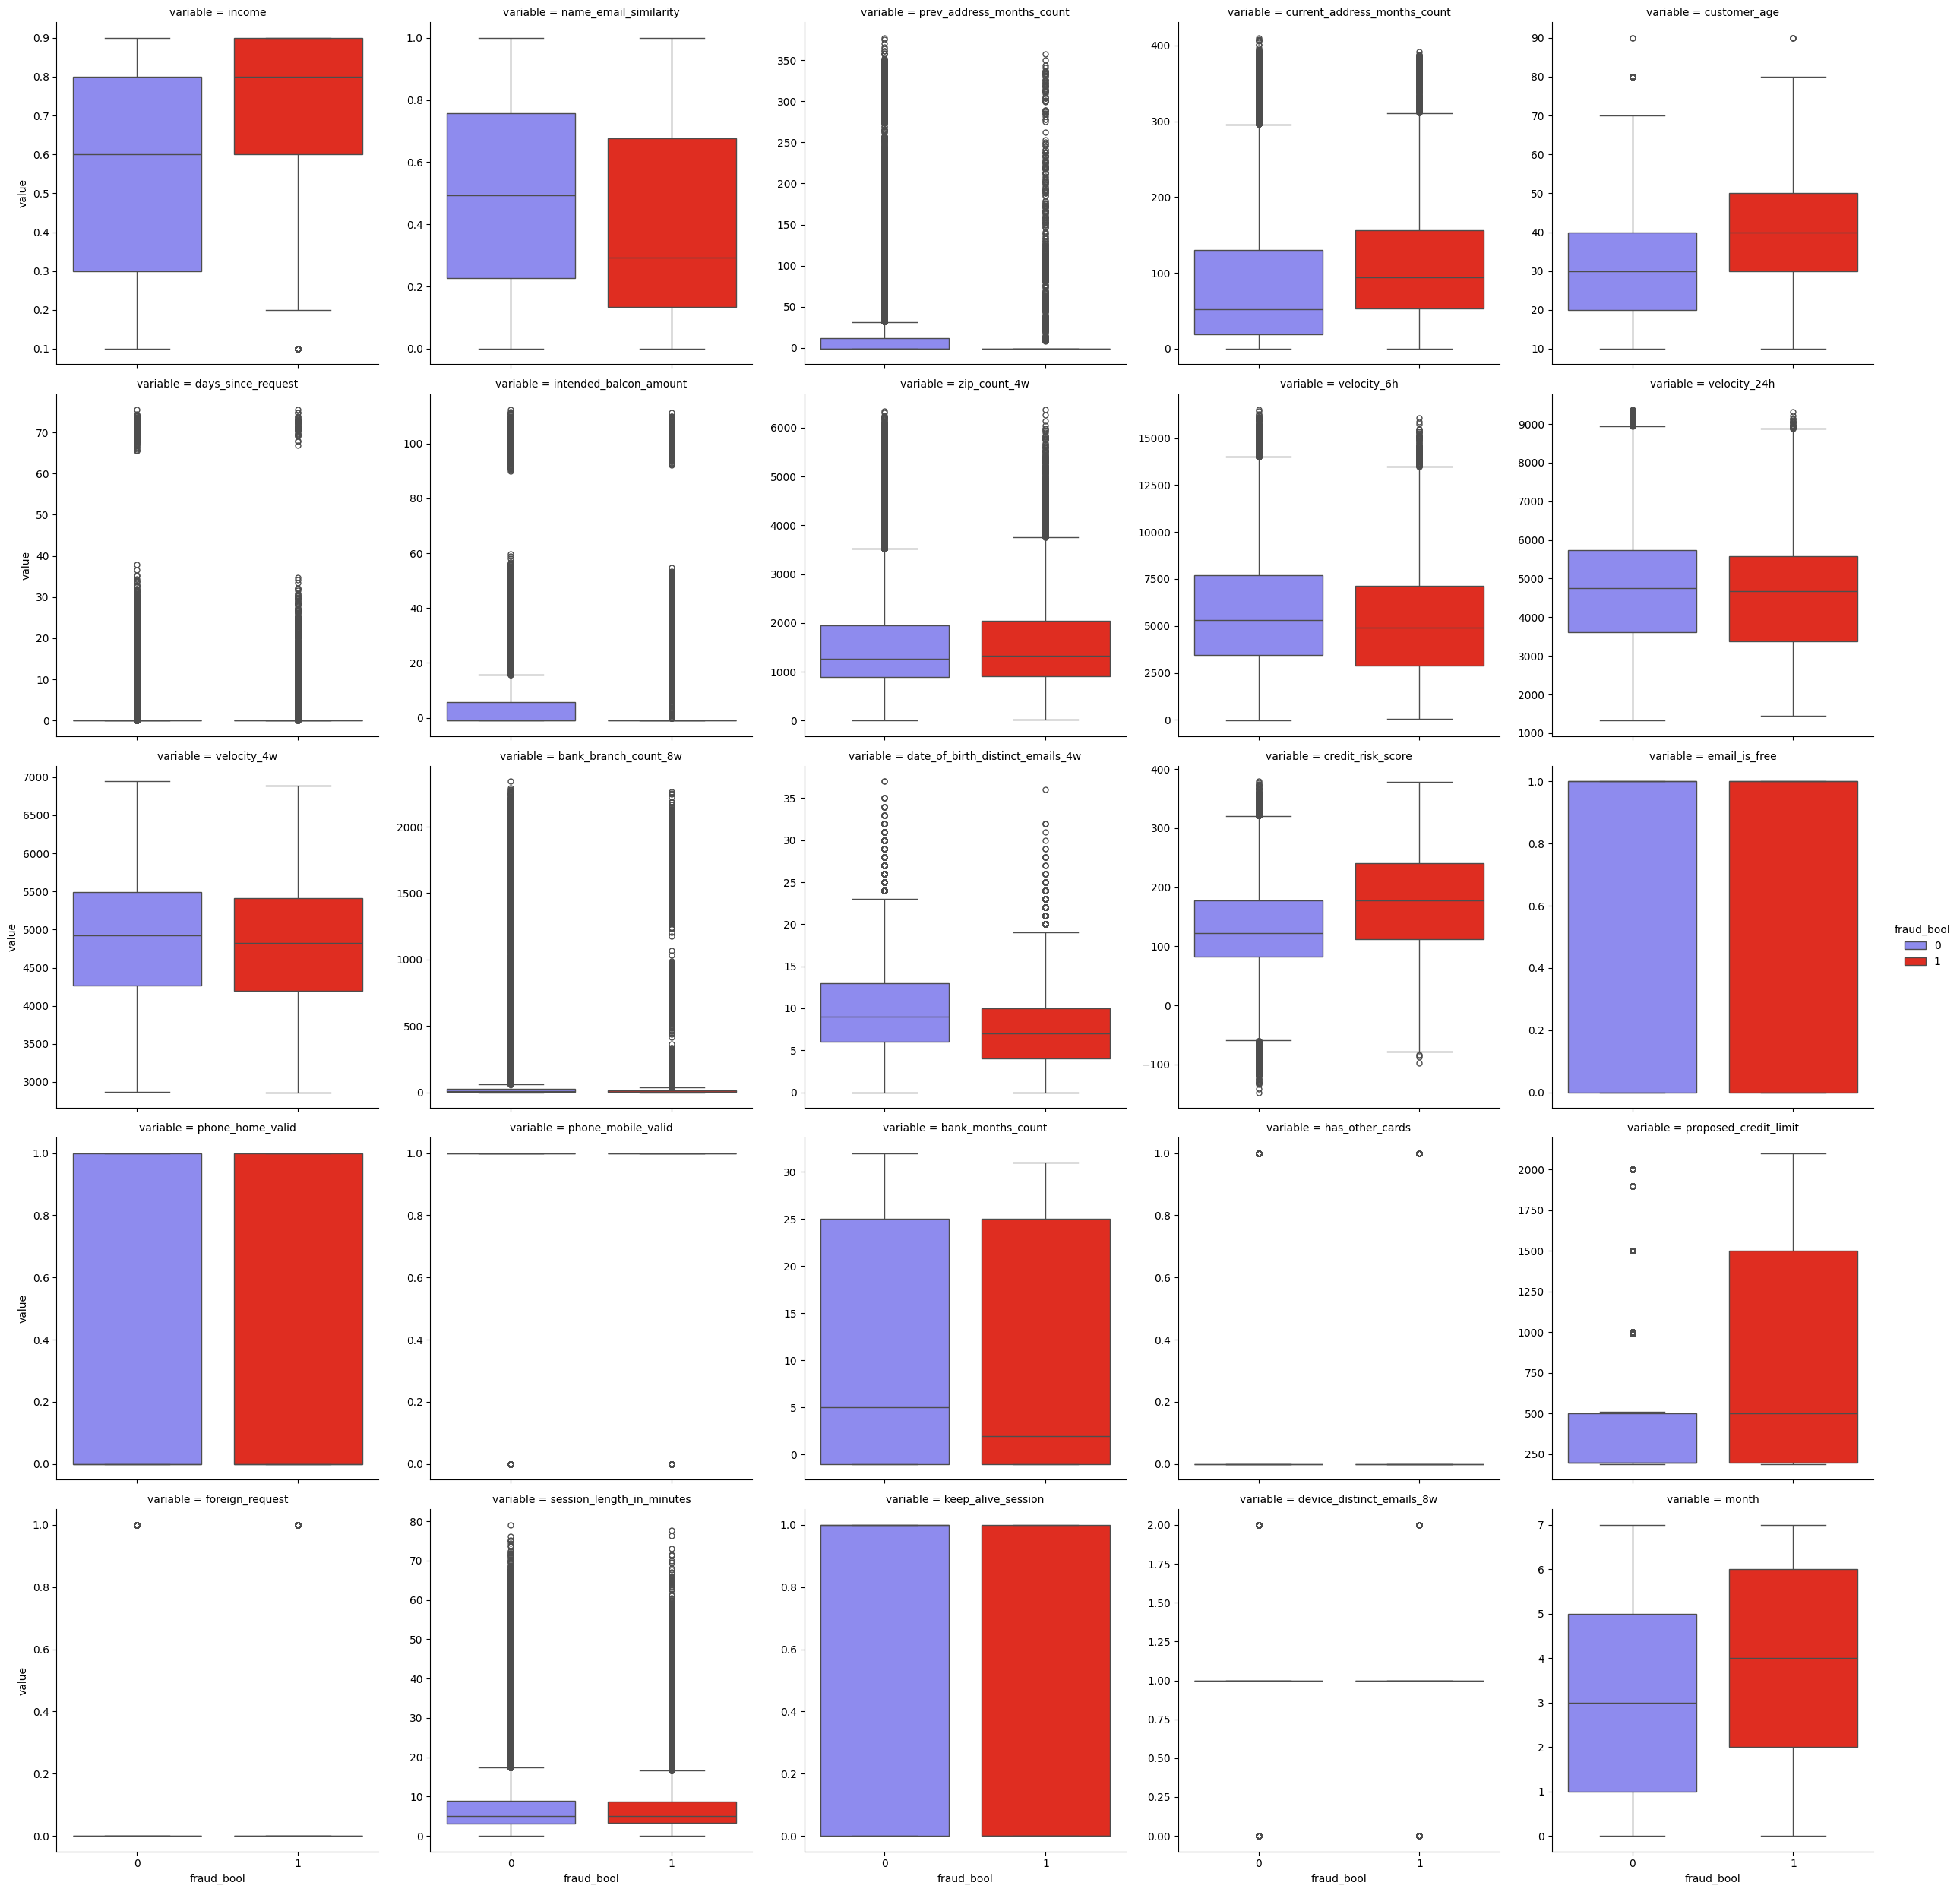

In [11]:
melt_df = non_categorical_label_df.melt(id_vars='fraud_bool')
sns.catplot(kind='box', data=melt_df, x='fraud_bool', y='value', col='variable', col_wrap=5,sharey=False, hue='fraud_bool', palette=sns.color_palette(['#7E7BFE', '#FF1101']), legend='full', legend_out=True)

We hope to observe a further separation based on the trends and patterns observed earlier. Since there is no clear separation between fraudulent and non-fraudulent instances for all variables when observing histograms, there is no statistically significant difference between fraudulent and non-fraudulent bank account applications. However, through boxplots, we were able to better quantify the difference in trends between fraudulent and non-fraudulent bank account applications compared to histograms.

Upon observation of the visualisations above, the following variables have median values of fraudulent bank account applications exceeding the upper quartile of non-fraudulent bank account applications:
- `income`
- `customer_age`
- `credit_risk_score`
- `proposed_credit_limit`


## Variable Correlation Analysis

In addition to examining the distribution of variables, we explored pair-wise correlation matrices to identify highly correlated variables. Multicollinearity can lead to overfitting or instability in models. Moreover, correlated features may mask interactions between true important features and reduce model interpretability. Identifying highly correlated features is also crucial for feature engineering, as it allows us to detect suspicious bank account applications when features deviate from typical correlations.

### Non-Categorical Variable Correlation
We analyzed the correlation between non-categorical variables.

C:\Users\boomm\AppData\Local\Temp\ipykernel_21528\1147800669.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = df.corr()


<AxesSubplot: >

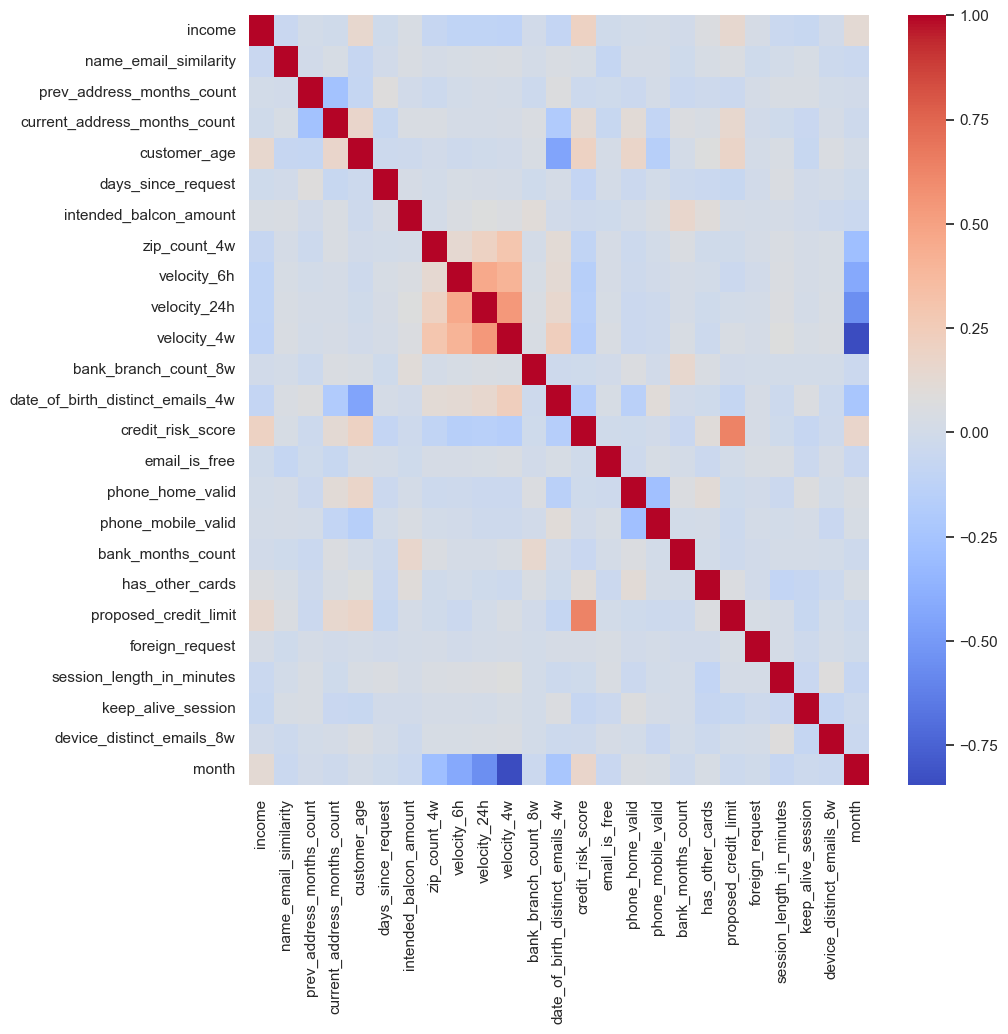

In [12]:
corr_mat = df.corr()
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".1f",xticklabels=True, yticklabels=True)

In [13]:
sorted_pairs = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool_)).stack().sort_values(ascending = False)
correlated_pairs = sorted_pairs[sorted_pairs.abs()>0.5]
correlated_pairs

credit_risk_score  proposed_credit_limit    0.633693
velocity_24h       velocity_4w              0.539791
                   month                   -0.552033
velocity_4w        month                   -0.845182
dtype: float64

From the correlation plot above, there are some areas of observed correlation between certain variables:
- positive correlation (0.634) between `credit_risk_score` and  `proposed_credit_limit`.
- positive correlation (0.540) between  `velocity_24h` and `velocity_4w`.
- negative correlation (-0.552) between `velocity_24h` and `month`.
- negative correlation (-0.845) between `velocity_4w` and `month`.

### Categorical Variable Correlation

To further explore correlations, we employed one-hot encoding on categorical variables and analyzed their correlation with other variables.

In [14]:
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(df[categorical_df.columns])
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_df.columns))
df_encoded = pd.concat([df, one_hot_df], axis=1)
df_encoded = df_encoded.drop(categorical_df.columns, axis=1)
df_encoded.head()

c:\Users\boomm\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.9,0.570800,-1,157,60,0.005908,35.337538,4079,8139.265753,4312.230612,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.1,0.993219,-1,67,20,0.015331,92.120139,1192,8330.727428,6708.346918,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.8,0.794351,-1,376,60,17.925951,41.422110,815,9747.407396,6902.019628,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.7,0.090000,-1,58,50,0.004134,-1.000000,4011,8036.901841,5794.624929,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.9,0.998248,31,45,30,0.010165,33.067538,525,6883.814598,3655.042385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot: >

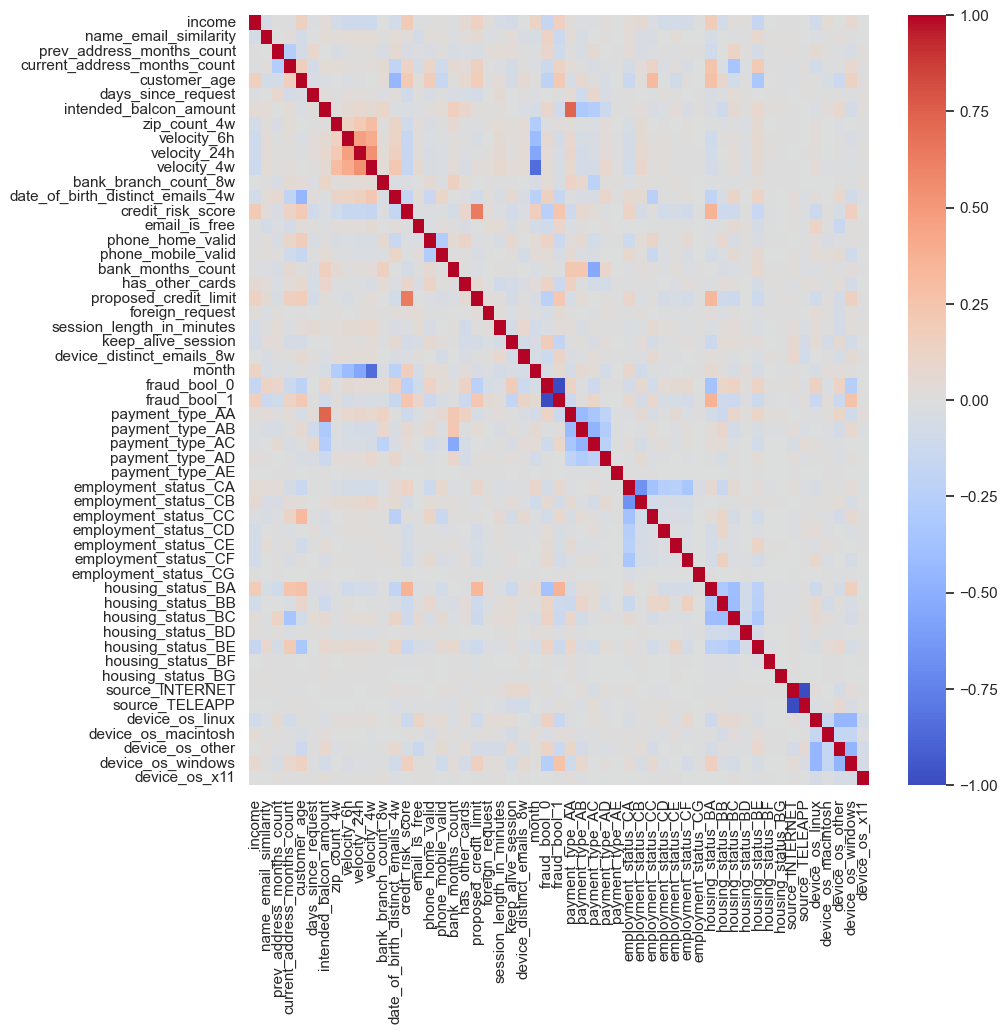

In [15]:
corr_mat = df_encoded.corr()
sns.set(rc = {'figure.figsize':(10, 10)})
sns.heatmap(corr_mat, cmap='coolwarm', fmt=".1f",xticklabels=True, yticklabels=True)

In [16]:
sorted_pairs = corr_mat.where(np.triu(np.ones(corr_mat.shape),k=1).astype(np.bool_)).stack().sort_values(ascending = False)
correlated_pairs = sorted_pairs[sorted_pairs.abs()>0.5]
correlated_pairs

intended_balcon_amount  payment_type_AA          0.728324
credit_risk_score       proposed_credit_limit    0.633693
velocity_24h            velocity_4w              0.539791
bank_months_count       payment_type_AC         -0.536299
velocity_24h            month                   -0.552033
employment_status_CA    employment_status_CB    -0.657397
velocity_4w             month                   -0.845182
source_INTERNET         source_TELEAPP          -1.000000
fraud_bool_0            fraud_bool_1            -1.000000
dtype: float64

Notably, from the correlation plot above, we observe that `payment_type_AA` and `payment_type_AC` showed stronger correlations with other variables as compared to other payment types. These new areas of correlations are:

- positive correlation (0.728) between `intended_balcon_amount` and  `payment_type_AA`.
- positive correlation (-0.536) between  `bank_months_count` and `payment_type_AC`.

This observation makes the variables a strong contender for hypothesis testing and feature engineering.

In [17]:
corr_mat.loc['fraud_bool_1'].sort_values(ascending=False).head(6)

fraud_bool_1             1.000000
housing_status_BA        0.362187
device_os_windows        0.260283
credit_risk_score        0.236261
proposed_credit_limit    0.226687
customer_age             0.214987
Name: fraud_bool_1, dtype: float64

In [18]:
corr_mat.loc['fraud_bool_1'].sort_values(ascending=False).tail(6)

name_email_similarity              -0.130370
device_os_other                    -0.131773
device_os_linux                    -0.143261
date_of_birth_distinct_emails_4w   -0.154419
keep_alive_session                 -0.179482
fraud_bool_0                       -1.000000
Name: fraud_bool_1, dtype: float64

While correlation is not causation, we can also observe the variables which are somewhat correlated to `fraud_bool` which can be useful in our subsequent hypothesis testing and feature engineering step. The top 5 most correlated variables are:
- `housing_status_BA` (+0.362)
- `device_os_windows` (+0.260)
- `credit_risk_score` (+0.236)
- `proposed_credit_limit` (+0.227)
- `customer_age` (+0.215).

## Feature Importance

n this section, we employed machine learning (ML) techniques on the dataset to determine feature importance. This method helps us to discern which features significantly contribute to model predictions which helps us in focusing our attention on more influential variables. The identified significant features can then be used in the future steps of hypothesis testing or feature engineering. The following ML were employed to determine feature importance:

- Random Forest
- Gradient Boosting
- Lasso

In [19]:
df_encoded = df_encoded.drop(columns=['fraud_bool_0', 'fraud_bool_1'])
df_label = df['fraud_bool']
df_label.head()

0    1
1    1
2    1
3    1
4    1
Name: fraud_bool, dtype: category
Categories (2, int64): [0, 1]

In [20]:
df_encoded.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,...,housing_status_BE,housing_status_BF,housing_status_BG,source_INTERNET,source_TELEAPP,device_os_linux,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.9,0.570800,-1,157,60,0.005908,35.337538,4079,8139.265753,4312.230612,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.1,0.993219,-1,67,20,0.015331,92.120139,1192,8330.727428,6708.346918,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.8,0.794351,-1,376,60,17.925951,41.422110,815,9747.407396,6902.019628,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.7,0.090000,-1,58,50,0.004134,-1.000000,4011,8036.901841,5794.624929,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.9,0.998248,31,45,30,0.010165,33.067538,525,6883.814598,3655.042385,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(df_encoded, df_label)
rf_feature_importances = rf_model.feature_importances_


# Gradient Boosting model
gbm_model = GradientBoostingClassifier()
gbm_model.fit(df_encoded, df_label)
gbm_feature_importances = gbm_model.feature_importances_



# Lasso regression model
lasso_model = Lasso(alpha=0.1) 
lasso_model.fit(df_encoded, df_label)
lasso_coefficients = lasso_model.coef_

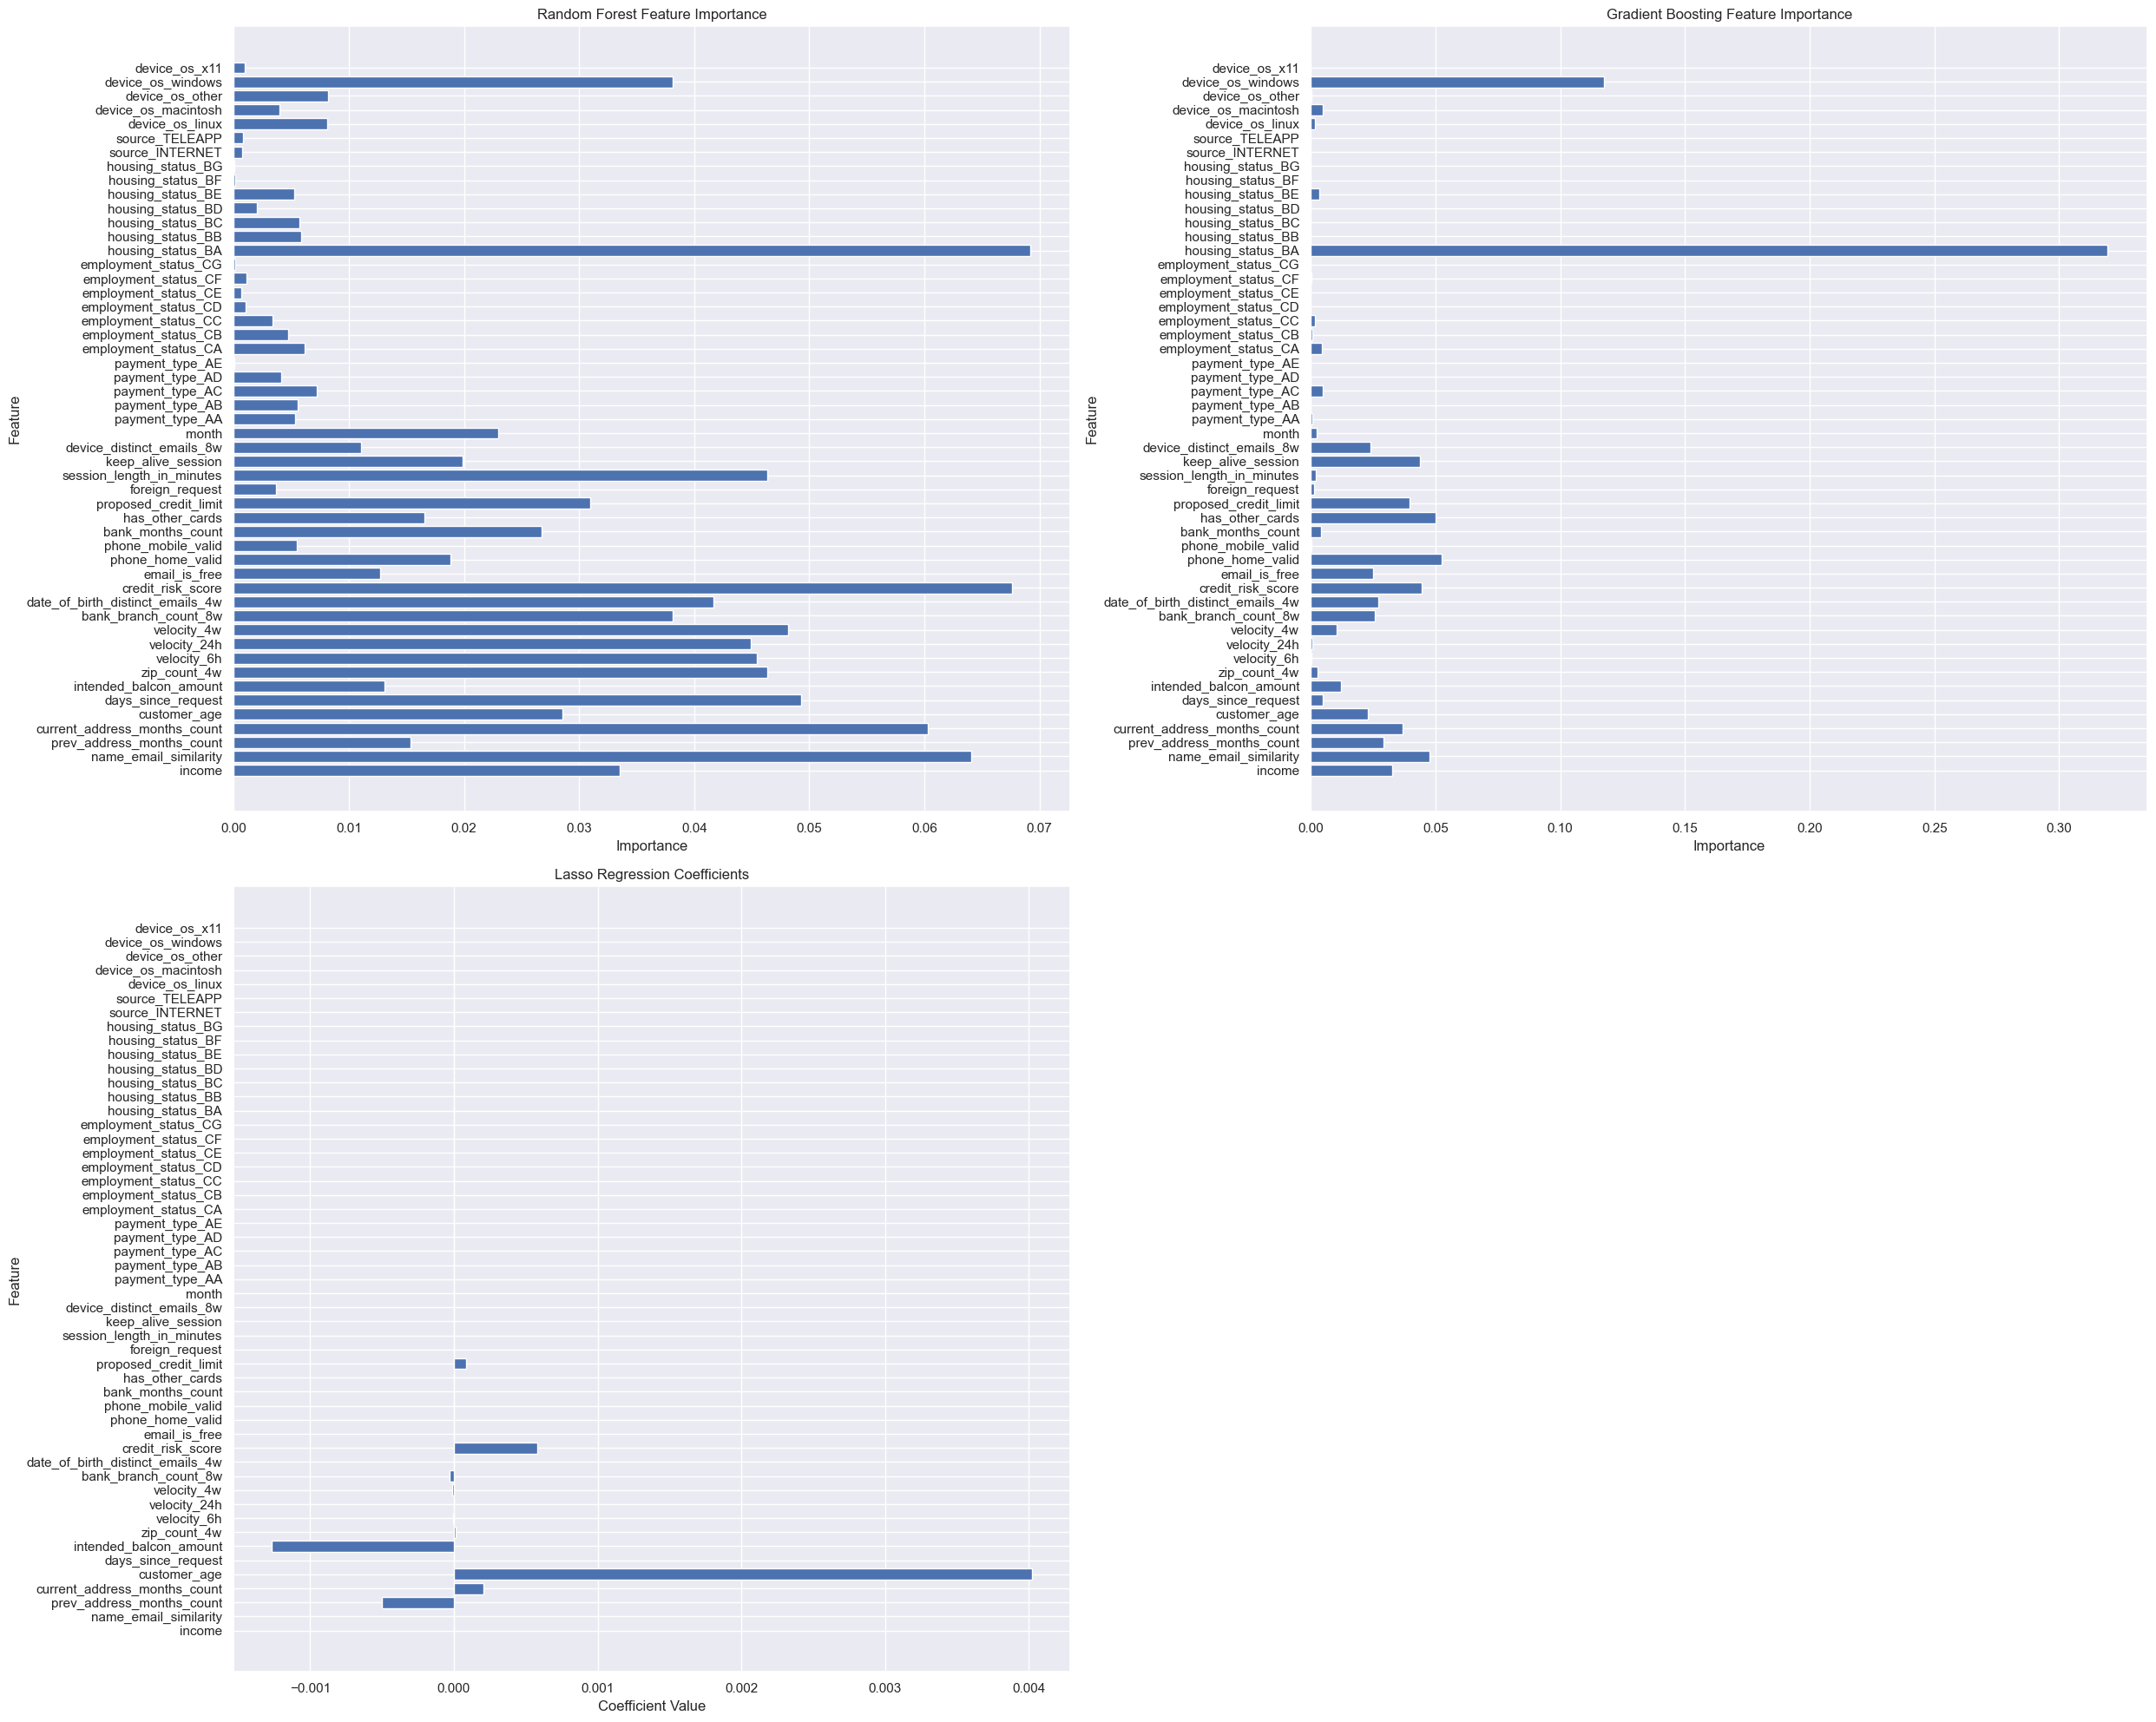

In [22]:
# Visualize feature importances
plt.figure(figsize=(25, 20))

plt.subplot(2, 2, 1)
plt.barh(range(len(rf_feature_importances)), rf_feature_importances, tick_label=df_encoded.columns)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(2, 2, 2)
plt.barh(range(len(gbm_feature_importances)), gbm_feature_importances, tick_label=df_encoded.columns)
plt.title('Gradient Boosting Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

plt.subplot(2, 2, 3)
plt.barh(range(len(lasso_coefficients)), lasso_coefficients, tick_label=df_encoded.columns)
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')

plt.tight_layout()
plt.show()

In [23]:
pd.DataFrame(np.column_stack([df_encoded.columns, rf_feature_importances]), columns=['variable', 'rf_feature_importance']).sort_values(by='rf_feature_importance',ascending=False).head()

,variable,rf_feature_importance
37,housing_status_BA,0.0692
13,credit_risk_score,0.067584
1,name_email_similarity,0.064055
3,current_address_months_count,0.060272
5,days_since_request,0.049299


In [24]:
pd.DataFrame(np.column_stack([df_encoded.columns, gbm_feature_importances]), columns=['variable', 'gbm_feature_importances']).sort_values(by='gbm_feature_importances',ascending=False).head()

,variable,gbm_feature_importances
37,housing_status_BA,0.319368
49,device_os_windows,0.117544
15,phone_home_valid,0.052305
18,has_other_cards,0.049927
1,name_email_similarity,0.04749


In [25]:
pd.DataFrame(np.column_stack([df_encoded.columns, lasso_coefficients]), columns=['variable', 'lasso_coefficients']).sort_values(by='lasso_coefficients',ascending=False).head()

,variable,lasso_coefficients
4,customer_age,0.004023
13,credit_risk_score,0.000578
3,current_address_months_count,0.000207
19,proposed_credit_limit,0.000085
7,zip_count_4w,0.000015


From the plots above, these are the top 5 important features we have identified for each model based on preliminary model testing.

For the Random Forest model, the top 5 important features are:
- `housing_status_BA` (0.0737)
- `credit_risk_score` (0.0656)
- `name_email_similarity` (0.0639)
- `current_address_months_count` (0.0599)
- `days_since_request` (0.0490).

For the Gradient Boost model, the top 5 important features are:
- `housing_status_BA` (0.319)
- `device_os_windows` (0.118)
- `phone_home_valid` (0.0523)
- `has_other_cards` (0.0499)
- `name_email_similarity` (0.0475).

For the Lasso Regression model, the top 5 important features are:
- `customer_age` (0.00402)
- `credit_risk_score` (0.000578)
- `intended_balcon_amount` (0.000207)
- `prev_address_months_count` (0.000085)
- `current_address_months_count` (0.000015).

## Mutual Information

In this section, we conducted mutual information analysis to gain insights into the relationships between variables and the label variable, fraud_bool. Mutual information measures the amount of information gained about one variable through the observation of another variable, making it a valuable tool for exploratory data analysis.

By assessing mutual information, we aim to identify variables that exhibit significant predictive power or information gain regarding the label variable. This aids in the identification of potential predictors of fraudulent behaviour and provides valuable insights into the dataset.

In [26]:
MIC = mutual_info_classif(df_encoded, df_label)
MIC = pd.Series(MIC)
MIC.index = df_encoded.columns
MIC.sort_values(ascending=False).head()

housing_status_BA        0.057577
device_os_windows        0.033599
credit_risk_score        0.030052
proposed_credit_limit    0.028626
keep_alive_session       0.026672
dtype: float64

<AxesSubplot: >

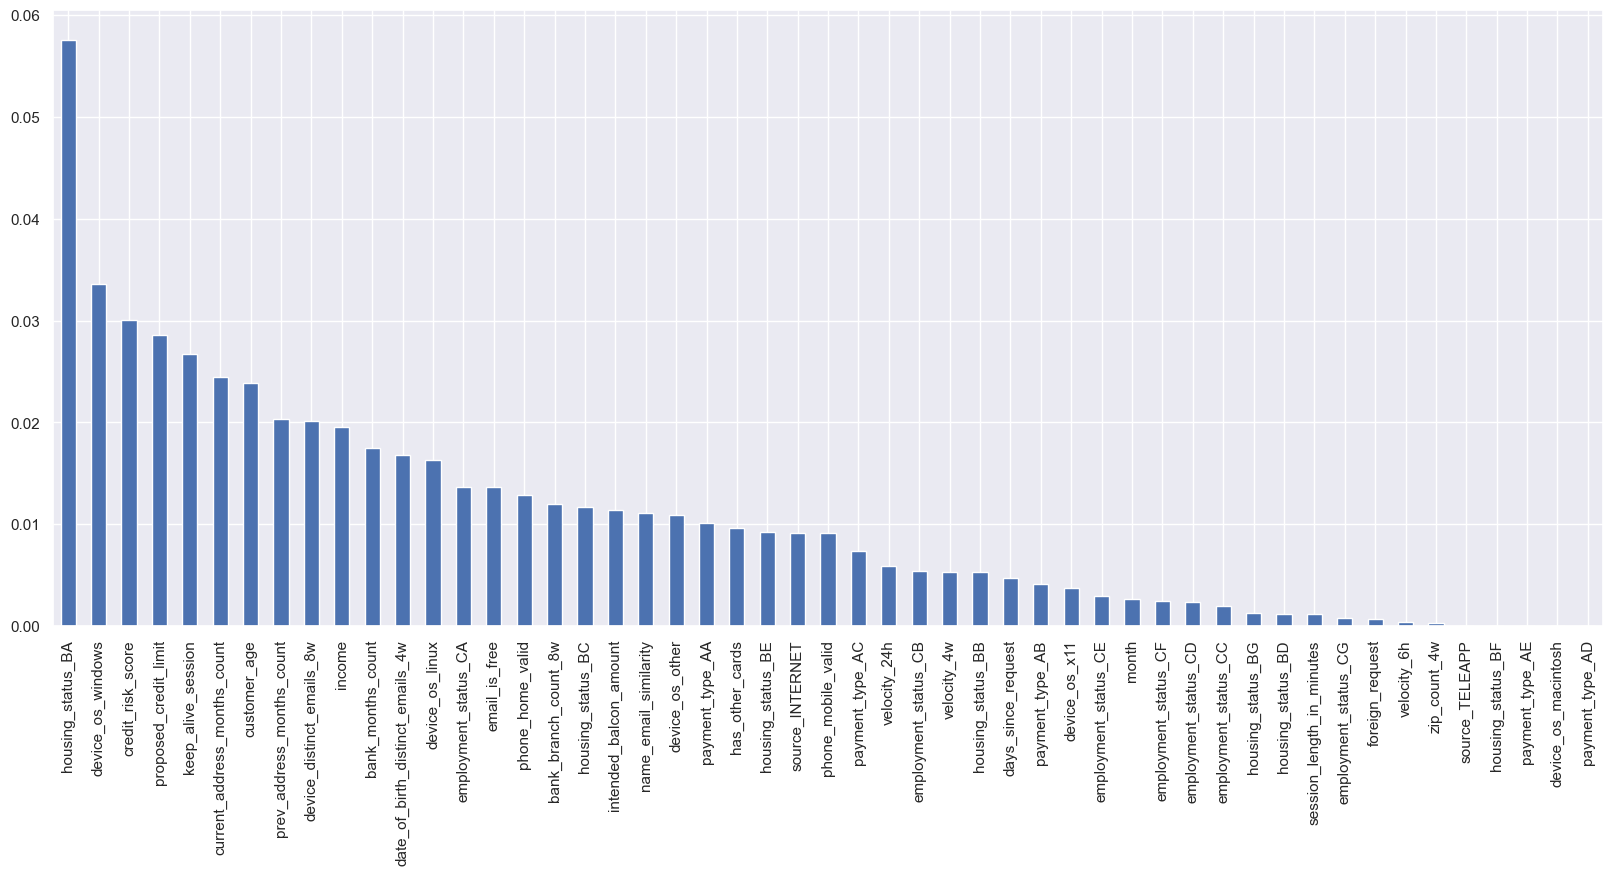

In [27]:
MIC.sort_values(ascending=False).plot.bar(figsize=(20, 8))

From the mutual information analysis, the top 5 variables with the highest mutual information with `fraud_bool` are:
- `housing_status_BA` (0.0557)
- `device_os_windows` (0.0315)
- `credit_risk_score` (0.0310)
- `proposed_credit_limit` (0.0292)
- `current_address_months_count` (0.0266).